# **K-Means Clustering**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

<img src = 'd_img.png' width=600 height=500> 

``Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.``

<img src = 'e_img.png' width=600 height=400>

``Such problems, without any fixed target variable, are known as unsupervised learning problems. In these problems, we only have the independent variables and no target/dependent variable.``

``In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.``

<hr>

#### **Why Clustering ?**
Clustering is very much important as it determines the intrinsic grouping among the unlabeled data present. There are no criteria for a good clustering. It depends on the user, what is the criteria they may use which satisfy their need. 

For instance, we could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection). 

This algorithm must make some assumptions which constitute the similarity of points and each assumption make different and equally valid clusters. 

<hr>

**K-means** is one of the simplest unsupervised learning algorithms that solve the clustering problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centers, one for each cluster.

<img src = 'f_img.gif'>

### **K-Means is applied in**

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data and to find patterns and make better decisions.. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

-    Customer Profiling:
-    market segmentation,
-    computer vision
-    Geo-statistics
-    Astronomy

<img src = 'g_img.png'>

### **Algorithm**

To start with k-means algorithm, you first have to randomly initialize points called the cluster centroids (K). K-means is an iterative algorithm and it does two steps: **1. Cluster assignment 2. Move centroid step.**

<img src = 'a_img.png'>

**1. Cluster assignment**

the algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the three cluster centroids.

**2. Move centroid**

Here, K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.

This process is repeated until there is no change in the clusters (or possibly until some other stopping condition is met). K is chosen randomly or by giving specific initial starting points by the user.

<img src = 'b_img.png'>

### **How to select the best K**

The algorithm clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

<img src = 'c_img.png'>

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the “elbow” on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

## **Mall Customers Segmentation**

In [115]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [116]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df.shape

(200, 5)

In [118]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [119]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### **Checking Missing Values**

In [120]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **Visualization**

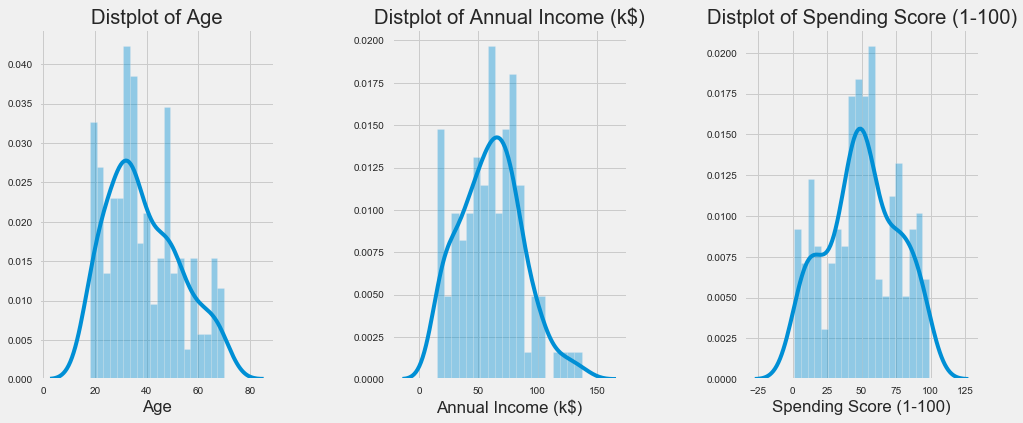

In [121]:
plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

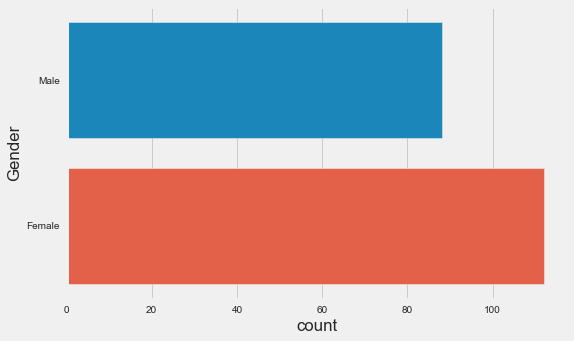

In [122]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### **Encode Gender Feature**

In [123]:
df['Gender_Bin'] = LabelEncoder().fit_transform(df[['Gender']])
df = df.drop(['Gender'], axis=1)

### **Rename**

In [124]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace = True) 

In [125]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


<hr>

## **Count Best k value for Training KMeans Model**

Untuk mengaplikasikan K-Means clustering kita perlu menentukan nilai k (jumlah clusternya). Ada beberapa metode untuk menentukan jumlah kluster:
1. Elbow Method
2. Average Silhouette Method
3. Gap Statistic Method

Dalam penentuan jumlah kluster kali ini, metode yang digunakan yaitu **Elbow Method**. Elbow Method secara sederhana menentukan jumlah optimal kluster (_optimal cluster number_) dilihat dari _optimal inertia_. Melihat _optimal inertia_ dapat dibuat grafik berikut ini. Nilai kluster optimal ada di bagian siku grafik inertia.

In [126]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 15)
[308862.06, 212889.44245524297, 143391.5923603568, 104422.8349853975, 75399.61541401483, 58348.64136331505, 51132.7032125769, 44389.807673557676, 40655.68621378622, 37425.924025974025, 34875.71916682352, 31739.649730552672, 29966.165803278247, 28442.769974633215]


Text(4, 50, 'Best k value = 4')

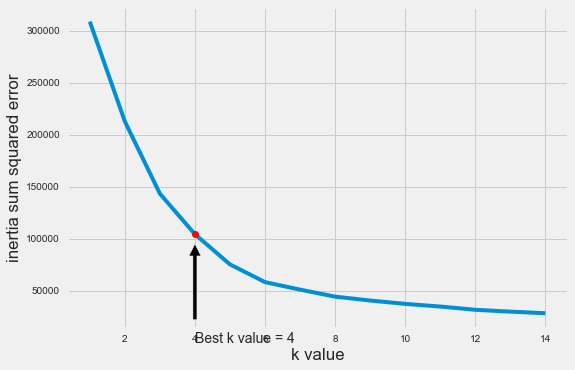

In [127]:
plt.plot(k, inertia) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k[3], inertia[3]),
    xytext = (4, 50), arrowprops = dict(facecolor='black', shrink=0.1)
)

### **Fitting K-Means Model**

In [128]:
model_KM = KMeans(n_clusters = 4, max_iter = 10000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM.fit(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
model_KM.labels_ #mengetahui hasil pengelompokan

array([1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### **Predict Cluster**

In [130]:
df['cluster'] = model_KM.predict(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,cluster
0,1,19,15,39,1,1
1,2,21,15,81,1,1
2,3,20,16,6,0,3
3,4,23,16,77,0,1
4,5,31,17,40,0,3


## **Plotting Cluster**

### **a. Age & Annual Income**

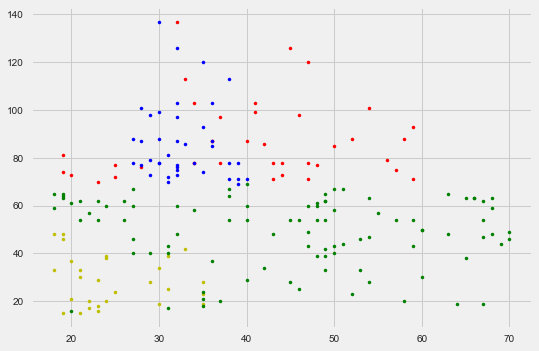

In [131]:
plt.plot(df['Age'][df['cluster'] == 0], df['Annual_Income'][df['cluster'] == 0], 'r.')
plt.plot(df['Age'][df['cluster'] == 1], df['Annual_Income'][df['cluster'] == 1], 'y.')
plt.plot(df['Age'][df['cluster'] == 2], df['Annual_Income'][df['cluster'] == 2], 'b.')
plt.plot(df['Age'][df['cluster'] == 3], df['Annual_Income'][df['cluster'] == 3], 'g.')

### **b. Age & Spending Score**

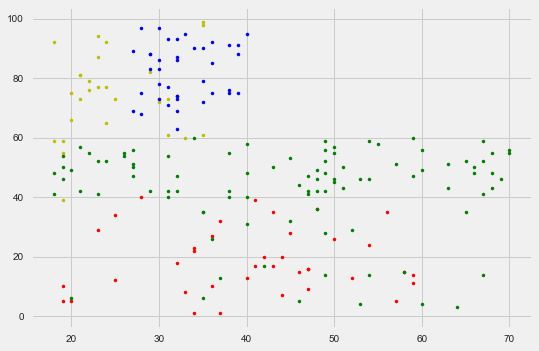

In [132]:
plt.plot(df['Age'][df['cluster'] == 0], df['Spending_Score'][df['cluster'] == 0], 'r.')
plt.plot(df['Age'][df['cluster'] == 1], df['Spending_Score'][df['cluster'] == 1], 'y.')
plt.plot(df['Age'][df['cluster'] == 2], df['Spending_Score'][df['cluster'] == 2], 'b.')
plt.plot(df['Age'][df['cluster'] == 3], df['Spending_Score'][df['cluster'] == 3], 'g.')

### **c. Gender & Annual Income**

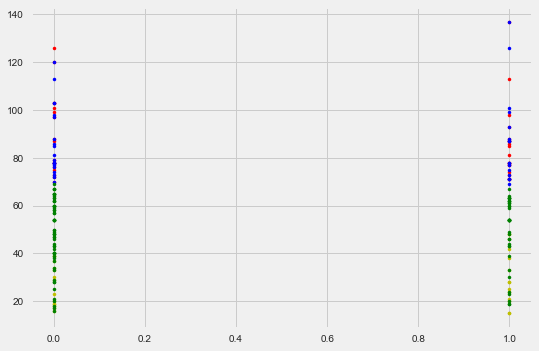

In [133]:
plt.plot(df['Gender_Bin'][df['cluster'] == 0], df['Annual_Income'][df['cluster'] == 0], 'r.')
plt.plot(df['Gender_Bin'][df['cluster'] == 1], df['Annual_Income'][df['cluster'] == 1], 'y.')
plt.plot(df['Gender_Bin'][df['cluster'] == 2], df['Annual_Income'][df['cluster'] == 2], 'b.')
plt.plot(df['Gender_Bin'][df['cluster'] == 3], df['Annual_Income'][df['cluster'] == 3], 'g.')

### **d. Gender & Spending_Score**

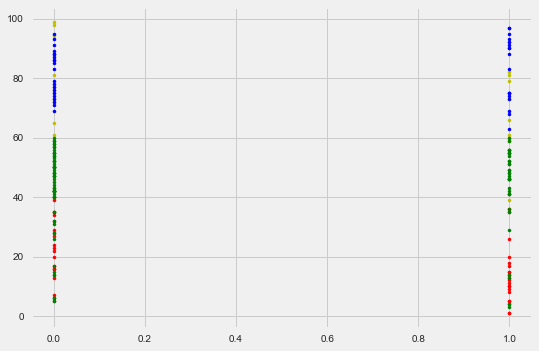

In [134]:
plt.plot(df['Gender_Bin'][df['cluster'] == 0], df['Spending_Score'][df['cluster'] == 0], 'r.')
plt.plot(df['Gender_Bin'][df['cluster'] == 1], df['Spending_Score'][df['cluster'] == 1], 'y.')
plt.plot(df['Gender_Bin'][df['cluster'] == 2], df['Spending_Score'][df['cluster'] == 2], 'b.')
plt.plot(df['Gender_Bin'][df['cluster'] == 3], df['Spending_Score'][df['cluster'] == 3], 'g.')

### **e. Annual Income & Spending Score**

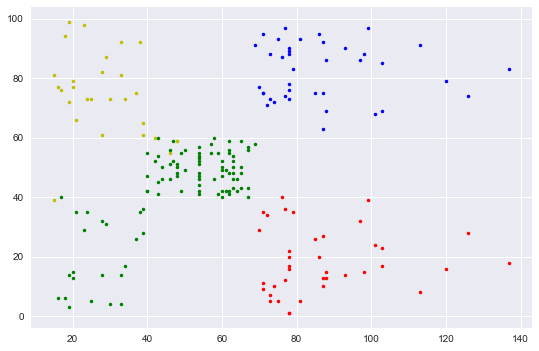

In [157]:
plt.plot(df['Annual_Income'][df['cluster'] == 0], df['Spending_Score'][df['cluster'] == 0], 'r.')
plt.plot(df['Annual_Income'][df['cluster'] == 1], df['Spending_Score'][df['cluster'] == 1], 'y.')
plt.plot(df['Annual_Income'][df['cluster'] == 2], df['Spending_Score'][df['cluster'] == 2], 'b.')
plt.plot(df['Annual_Income'][df['cluster'] == 3], df['Spending_Score'][df['cluster'] == 3], 'g.')

``Contoh di atas masih menggunakan seluruh feature. Tidak ada framework teori pemasaran untuk memilih feature yang tepat. Sehingga alur analisis clustering cukup sulit dipahami. Hal ini tentu akan menyulitkan marketing team untuk mengambil insight dari hasil analisis kita. Di bawah ini, Anda akan ditugaskan untuk membuat Clustering sesuai teori pemasaran.``

# **User Segmentation**

<hr>

Selain membuat sistem rekomendasi, final project ini juga memberikan insight-insight bisnis. Salah satu insight bisnis yang diberikan adalah segmentasi user (_Customer Segmentation_).

Customer segmentation adalah proses membagi-bagi pasar/konsumen ke dalam kelompok-kelompok dengan karakteristik sama. Customer segmentation dapat menjadi sebuah cara yang powerful untuk mengindetifikasi kebutuhan konsumen .
Metode umum yang sering dipakai untuk segmentasi user/customer dalam  adalah:
1. **Demographic Information**, user dikelompokkan berdasarkan gender, usia, status pernikahan, status kepemilikan rumah, atau pendidikan.
2. **Geographical Information**, user dikelompokkan berdasarkan domisili tempat tinggal atau tempat user bekerja.
3. **Psychographics**, user dikelompokkan berdasarkan kelas sosial, lifestyle, dan kepribadian.
4. **Behavioral Data**, user dikelompokkan berdasarkan kebiasaan mengonsumsi atau menggunakan suatu produk dan layanan.

**Manfaat Customer Segmentation**
1. Menentukan harga produk yang sesuai dengan daya beli user
2. Membangun marketing campaign yang sesuai dengan karakter user
3. Mendesain strategi distribusi yang optimal
4. Memilih feature produk yang cocok dengan kebutuhan user
5. Mampu memilih prioritas produk baru yang perlu dikembangkan

<hr>

## **Take Class Exercise**
### - Tentukan feature apa saja dalam dataset Mall_Customer yang make sense untuk user segmentation!
### - Buat Clustering baru berdasarkan feature tersebut!
### - Apa insight yang dapat Anda jelaskan dari segmentation yang Anda buat!

## **Cluster Centroid**

In [136]:
# cek posisi centroids
model_KM.cluster_centers_

array([[40.39473684, 87.        , 18.63157895,  0.52631579],
       [24.82142857, 28.71428571, 74.25      ,  0.5       ],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [44.89473684, 48.70526316, 42.63157895,  0.37894737]])

<hr>

## **Evaluation Metrics**

In [137]:
# silhouette coefficient / koef bayangan
# standart: -1 s/d 1 => seberapa bagus model mendefinisikan cluster

metrics.silhouette_score(
    df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']],
    model_KM.labels_,
    metric = 'euclidean')


0.4052954330641215

In [138]:
# Calinski-Harabasz index: variance ratio criterion
# seberapa bagus model mendefinisikan cluster
# lebih besar lebih bagus

metrics.calinski_harabasz_score(
    df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']],
    model_KM.labels_
)

127.92482557839757

In [139]:
# Davies-Bouldin Index
# semakin rendah nilainya semakin bagus model dalam memisahkan cluster

metrics.davies_bouldin_score(
    df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']],
    model_KM.labels_
)

0.8918193554892446

<hr>

## **Mall Customer Segmentation**

#### **Pilihan User Segmentation**
Pada dataset di atas terdapat feature pada user yang bisa digunakan untuk user segmentation:
1. Gender (__Demographic__)
2. Age  (__Demographic__)
3. Annual Income (__Behavioral Data Resource__)
4. Spending Socre (__Behavioral Data__)


Berdasarkan teori dan ketersediaan feature pada dataset, maka pilihan user segmentation: __Demographic information dan Behavioral Data__.

**Pertama**, user segmentation berdasarkan skor belanja dan potensi konsumen menggunakan data ``Annual Income`` dan ``Spending Socre`` menggunakan Kmeans.

**Kedua**, setelah segmentasi pertama kita dapatkan cluster-cluster berdasarkan spending score dan annual income. Setelah itu tiap cluster akan dieksplorasi berdasarkan demografi user yaitu jenis kelamin (``gender_user``) dan usia (``age_user``). 

In [140]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df[['Annual_Income', 'Spending_Score']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 15)
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 31676.36973205366, 25012.917069885476, 21862.092672182887, 19646.482018947238, 17593.5340346421, 16144.828249066533, 14293.14305433129, 13474.626424097725]


Text(4, 200, 'Best k value = 4')

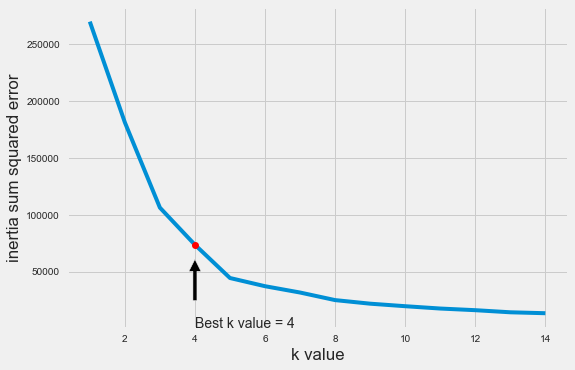

In [141]:
plt.plot(k, inertia) #melihat pada sudut siku dalam plot
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k[3], inertia[3]),
    xytext = (4, 200), arrowprops = dict(facecolor='black', shrink=0.2)
)

In [142]:
KM_model = KMeans(n_clusters = 4, max_iter = 10000)

In [143]:
KM_model.fit(df[['Annual_Income', 'Spending_Score']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
df['Cluster2'] = KM_model.predict(df[['Annual_Income', 'Spending_Score']])

In [145]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,cluster,Cluster2
0,1,19,15,39,1,1,1
1,2,21,15,81,1,1,3
2,3,20,16,6,0,3,1
3,4,23,16,77,0,1,3
4,5,31,17,40,0,3,1


In [146]:
# centroid
KM_model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895],
       [48.26      , 56.48      ]])

<hr>

## **Visualization**

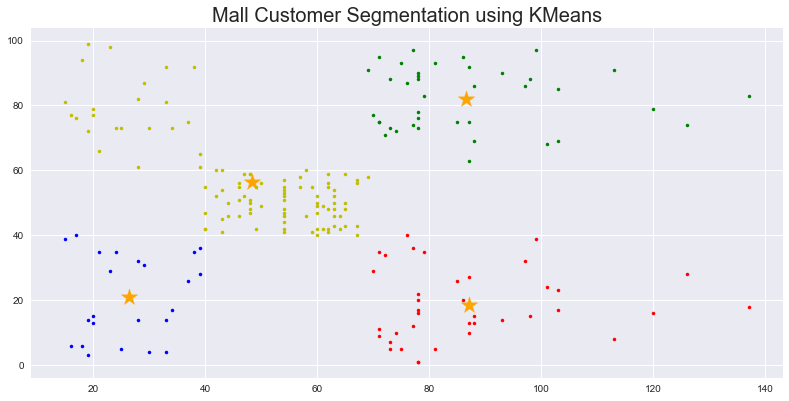

In [147]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))
plt.scatter(
    KM_model.cluster_centers_[:, 0],
    KM_model.cluster_centers_[:, 1],
    color = 'orange', marker = '*', s = 300
)
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'g.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'b.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'r.')
plt.plot(df['Annual_Income'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'y.')
plt.grid(True)
plt.title("Mall Customer Segmentation using KMeans", size=20)
plt.show()

Visualisasi selanjutnya dibuat multiplot.

Text(0.5, 1.0, 'Mall Customer in Cluster 3')

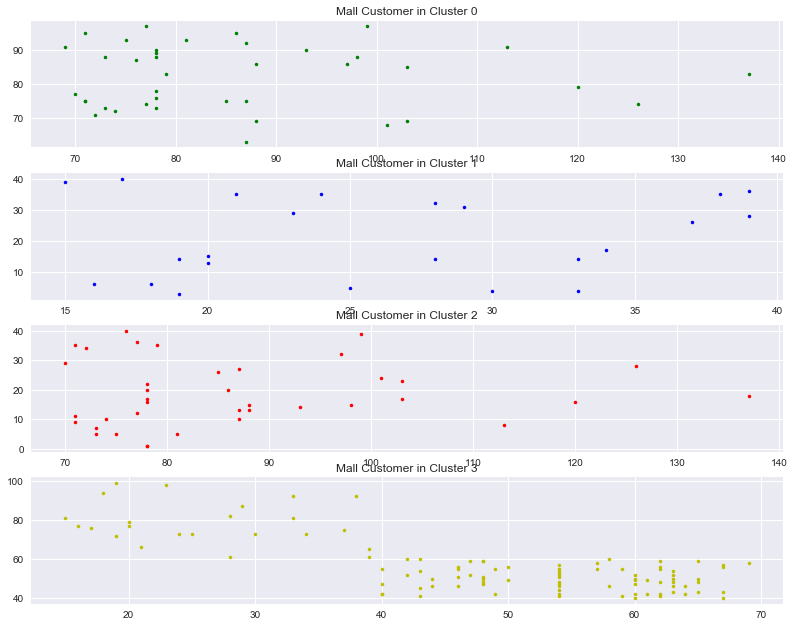

In [148]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'g.')
plt.title('Mall Customer in Cluster 0')
plt.subplot(412)
plt.plot(df['Annual_Income'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'b.')
plt.title('Mall Customer in Cluster 1')
plt.subplot(413)
plt.plot(df['Annual_Income'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'r.')
plt.title('Mall Customer in Cluster 2')
plt.subplot(414)
plt.plot(df['Annual_Income'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'y.')
plt.title('Mall Customer in Cluster 3')

<hr>

## **Cluster Exploration using Demographic Segmentation**

Setelah mendapatkan cluster 0 sampai 3, kita eksplorasi berdasarkan aspek demografiknya.

Lokasi centroid (titik tengah) pada tiap kluster dapat dilihat berikut ini:

In [149]:
KM_model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895],
       [48.26      , 56.48      ]])

Jumlah user di tiap kluster dapat dilihat di bawah ini. User di kluster 0 paling banyak, yaitu 124 user. Terbanyak kedua, yaitu user di kluster 2 sebanyak 25 user. Kluster 0 hanya diisi oleh satu user.

In [150]:
df_user_cluster_0 = df[df['Cluster2'] == 0]
df_user_cluster_1 = df[df['Cluster2'] == 1]
df_user_cluster_2 = df[df['Cluster2'] == 2]
df_user_cluster_3 = df[df['Cluster2'] == 3]

In [151]:
number_uc0 = len(df_user_cluster_0['CustomerID'].unique())
number_uc1 = len(df_user_cluster_1['CustomerID'].unique())
number_uc2 = len(df_user_cluster_2['CustomerID'].unique())
number_uc3 = len(df_user_cluster_3['CustomerID'].unique())

print(f'Jumlah user di cluster 0: {number_uc0} \nJumlah user di cluster 1: {number_uc1}\nJumlah user di cluster 2: {number_uc2} \nJumlah user di cluster 3: {number_uc3}')

Jumlah user di cluster 0: 39 
Jumlah user di cluster 1: 23
Jumlah user di cluster 2: 38 
Jumlah user di cluster 3: 100


### **1) Cluster 0**

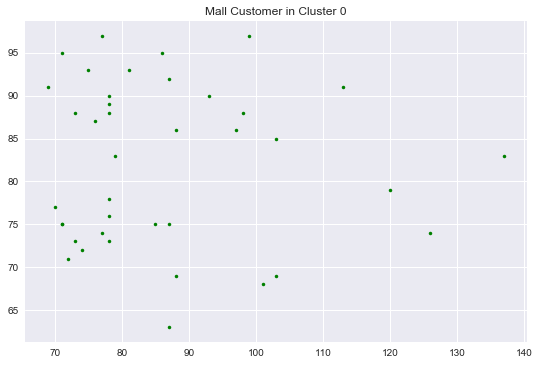

In [152]:
plt.plot(df['Annual_Income'][df['Cluster2'] == 0], df['Spending_Score'][df['Cluster2'] == 0], 'g.')
plt.title('Mall Customer in Cluster 0')
plt.show()

#### **Gender Distribution**

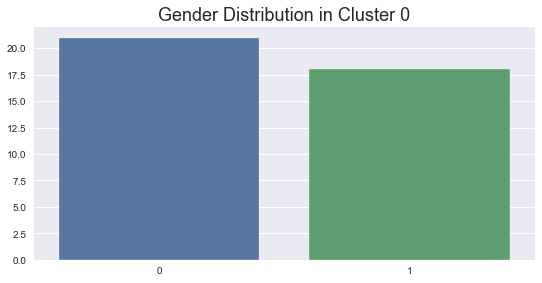

In [154]:
genders = df_user_cluster_0['Gender_Bin'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution in Cluster 0", size=18)
plt.show()

#### **Gender & Age Distribution**

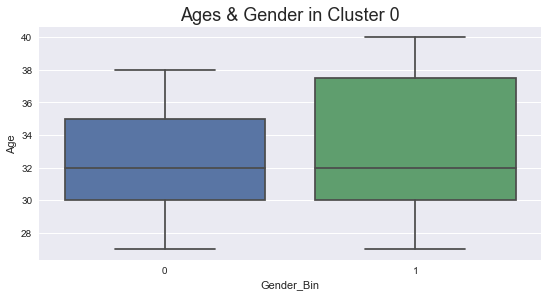

In [153]:
plt.figure(figsize=(8,4))
plt.title("Ages & Gender in Cluster 0", size=18)
sns.axes_style("dark")
ax = sns.boxplot(x="Gender_Bin", y="Age", data=df_user_cluster_0)
plt.show()

In [155]:
df_user_cluster_0['AgeBand'] = pd.cut(df_user_cluster_0['Age'], 3)

In [166]:
df_uc0_ct = pd.crosstab(df_user_cluster_0['AgeBand'], df_user_cluster_0['Gender_Bin'])
df_uc0_ct

Gender_Bin,0,1
AgeBand,,
"(26.987, 31.333]",10,6
"(31.333, 35.667]",7,6
"(35.667, 40.0]",4,6


In [160]:
df_pivot_uc0 = pd.pivot_table(df_user_cluster_0, values='Spending_Score', index=['AgeBand'],
                              columns=['Gender_Bin'], aggfunc=np.mean)
df_pivot_uc0

Gender_Bin,0,1
AgeBand,,
"(26.987, 31.333]",82.600000,81.5
"(31.333, 35.667]",80.285714,80.5
"(35.667, 40.0]",81.750000,86.0


### **2) Cluster 1**

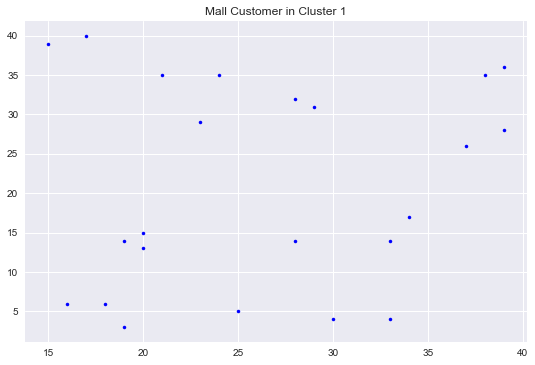

In [181]:
plt.plot(df['Annual_Income'][df['Cluster2'] == 1], df['Spending_Score'][df['Cluster2'] == 1], 'b.')
plt.title('Mall Customer in Cluster 1')
plt.show()

#### **Gender Distribution**

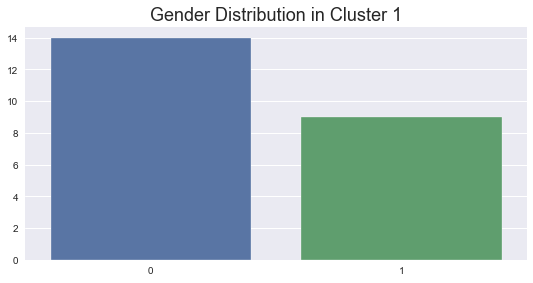

In [163]:
genders = df_user_cluster_1['Gender_Bin'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution in Cluster 1", size=18)
plt.show()

#### **Gender & Age Distribution**

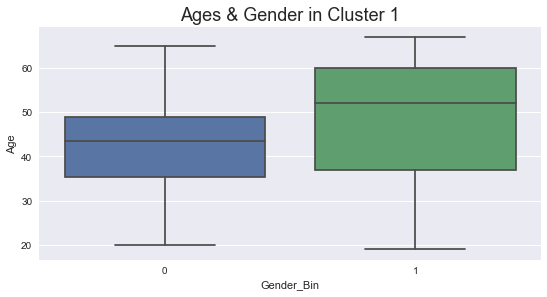

In [162]:
plt.figure(figsize=(8,4))
plt.title("Ages & Gender in Cluster 1", size=18)
sns.axes_style("dark")
ax = sns.boxplot(x="Gender_Bin", y="Age", data=df_user_cluster_1)
plt.show()

In [164]:
df_user_cluster_1['AgeBand'] = pd.cut(df_user_cluster_1['Age'], 3)

In [167]:
df_uc1_ct = pd.crosstab(df_user_cluster_1['AgeBand'], df_user_cluster_1['Gender_Bin'])
df_uc1_ct

Gender_Bin,0,1
AgeBand,,
"(18.952, 35.0]",4,2
"(35.0, 51.0]",7,2
"(51.0, 67.0]",3,5


In [168]:
df_pivot_uc1 = pd.pivot_table(df_user_cluster_1, values='Spending_Score', index=['AgeBand'],
                              columns=['Gender_Bin'], aggfunc=np.mean)
df_pivot_uc1

Gender_Bin,0,1
AgeBand,,
"(18.952, 35.0]",21.750000,37.0
"(35.0, 51.0]",21.857143,24.5
"(51.0, 67.0]",21.333333,10.8


### **3) Cluster 2**

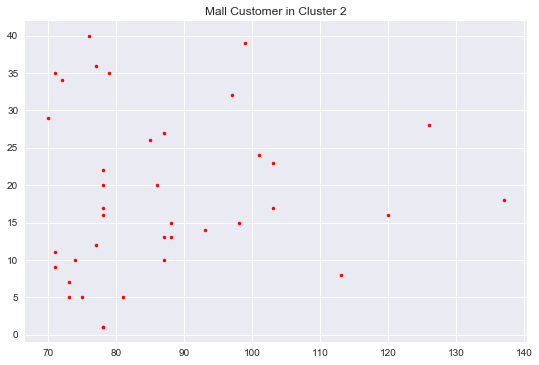

In [182]:
plt.plot(df['Annual_Income'][df['Cluster2'] == 2], df['Spending_Score'][df['Cluster2'] == 2], 'r.')
plt.title('Mall Customer in Cluster 2')
plt.show()

#### **Gender Distribution**

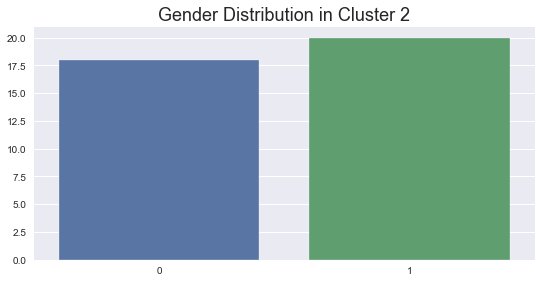

In [171]:
genders = df_user_cluster_2['Gender_Bin'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution in Cluster 2", size=18)
plt.show()

#### **Gender & Age Distribution**

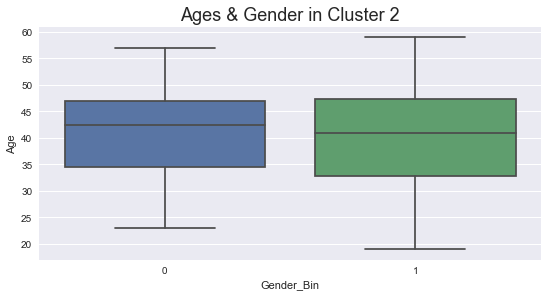

In [170]:
plt.figure(figsize=(8,4))
plt.title("Ages & Gender in Cluster 2", size=18)
sns.axes_style("dark")
ax = sns.boxplot(x="Gender_Bin", y="Age", data=df_user_cluster_2)
plt.show()

In [172]:
df_user_cluster_2['AgeBand'] = pd.cut(df_user_cluster_2['Age'], 3)

In [173]:
df_uc2_ct = pd.crosstab(df_user_cluster_2['AgeBand'], df_user_cluster_2['Gender_Bin'])
df_uc2_ct

Gender_Bin,0,1
AgeBand,,
"(18.96, 32.333]",3,5
"(32.333, 45.667]",9,8
"(45.667, 59.0]",6,7


In [174]:
df_pivot_uc2 = pd.pivot_table(df_user_cluster_2, values='Spending_Score', index=['AgeBand'],
                              columns=['Gender_Bin'], aggfunc=np.mean)
df_pivot_uc2

Gender_Bin,0,1
AgeBand,,
"(18.96, 32.333]",34.333333,10.000
"(32.333, 45.667]",23.888889,13.125
"(45.667, 59.0]",18.166667,18.000


### **3) Cluster 3**

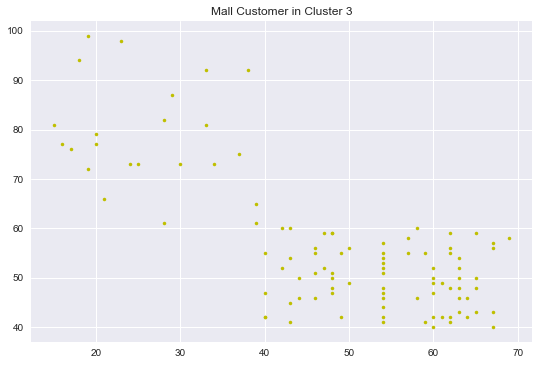

In [183]:
plt.plot(df['Annual_Income'][df['Cluster2'] == 3], df['Spending_Score'][df['Cluster2'] == 3], 'y.')
plt.title('Mall Customer in Cluster 3')
plt.show()

#### **Gender Distribution**

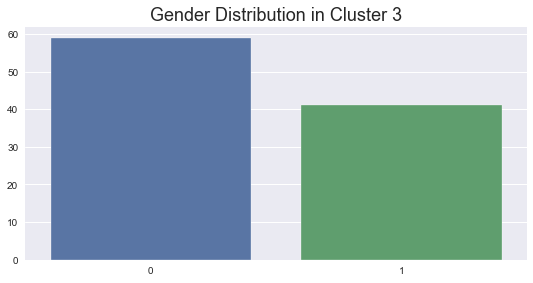

In [177]:
genders = df_user_cluster_3['Gender_Bin'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution in Cluster 3", size=18)
plt.show()

#### **Gender & Age Distribution**

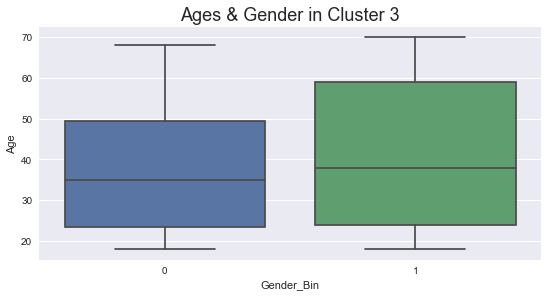

In [176]:
plt.figure(figsize=(8,4))
plt.title("Ages & Gender in Cluster 3", size=18)
sns.axes_style("dark")
ax = sns.boxplot(x="Gender_Bin", y="Age", data=df_user_cluster_3)
plt.show()

In [178]:
df_user_cluster_3['AgeBand'] = pd.cut(df_user_cluster_3['Age'], 3)

In [179]:
df_uc3_ct = pd.crosstab(df_user_cluster_3['AgeBand'], df_user_cluster_3['Gender_Bin'])
df_uc3_ct

Gender_Bin,0,1
AgeBand,,
"(17.948, 35.333]",31,20
"(35.333, 52.667]",19,7
"(52.667, 70.0]",9,14


In [180]:
df_pivot_uc3 = pd.pivot_table(df_user_cluster_3, values='Spending_Score', index=['AgeBand'],
                              columns=['Gender_Bin'], aggfunc=np.mean)
df_pivot_uc3

Gender_Bin,0,1
AgeBand,,
"(17.948, 35.333]",62.645161,64.250000
"(35.333, 52.667]",48.052632,48.142857
"(52.667, 70.0]",52.222222,50.071429


``Berdasarkan clustering based on behavioral data lalu dilanjutkan eksplorasi berdasarkan data-data demografik memungkinkan kita untuk mendapatkan insight lebih luas tentang user/market. Team marketing akan terbantu dengan informasi yang lebih detail terkait siapa target market yang paling potensial untuk perusahaan.``

## **Reference**:
- Gifa Delyani Nursyafitri, "K-Means Clustering menggunakan Python", https://medium.com/@gifadelyaninursyafitri/k-means-clustering-menggunakan-python-deeb0881333c
- Fauziyah Dewi, "K-Means Clustering with Scikit-Learn in Python", https://medium.com/@fauziyahdewi16/k-means-clustering-with-scikit-learn-in-python-b8e7835d9753
- Ryan Reza Fadillah, "Ritel K-Mean Clustering Using Python", https://medium.com/@ryanrezafadillah/ritel-k-mean-clustering-using-python-90f813b474b1
- Dileka Madushan, "Introduction to K-means Clustering", https://medium.com/@dilekamadushan/introduction-to-k-means-clustering-7c0ebc997e00
- Seema Singh, "K-Means Clustering", https://medium.com/datadriveninvestor/k-means-clustering-b89d349e98e6
- Rizky Desi Ramadhani, "Memahami K-Mean Clustering Pada Machine Learning Dengan Phyton", https://medium.com/@16611129/memahami-k-mean-clustering-pada-machine-learning-dengan-phyton-430323d80868
- Pulkit Sharma, "The Most Comprehensive Guide to K-Means Clustering You’ll Ever Need", https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- Geeksforgeeks, "K means Clustering – Introduction", https://www.geeksforgeeks.org/k-means-clustering-introduction/
- Dr. Michael J. Garbade, "Understanding K-means Clustering in Machine Learning", https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- Geeksforgeeks, "Clustering in Machine Learning", https://www.geeksforgeeks.org/clustering-in-machine-learning/
- Dataset source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python